In [63]:
import pandas as pd
import numpy as np
import re
import nltk
import pickle
from nltk.corpus import stopwords
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
df = pd.read_csv('./Datasets/Recipes/Final_Data.csv')
df.drop(columns='Unnamed: 0',inplace=True)
df

,name,id,minutes,contributor_id,submitted,tags,nutrition,n_steps,steps,description,ingredients,n_ingredients,rating,top_rating
0,arriba baked winter squash mexican style,137739,55,47892,2005-09-16,"[""'60-minutes-or-less'"", ""'time-to-make'"", ""'c...","[51.5, 0.0, 13.0, 0.0, 2.0, 0.0, 4.0]",11,make a choice and proceed with recipe dependi...,autumn is my favorite time of year to cook! th...,"[""'winter squash'"", ""'mexican seasoning'"", ""'m...",7,5.0,1
1,a bit different breakfast pizza,31490,30,26278,2002-06-17,"[""'30-minutes-or-less'"", ""'time-to-make'"", ""'c...","[173.4, 18.0, 0.0, 17.0, 22.0, 35.0, 1.0]",9,preheat oven to 425 degrees f press dough int...,this recipe calls for the crust to be prebaked...,"[""'prepared pizza crust'"", ""'sausage patty'"", ...",6,3.5,1
2,all in the kitchen chili,112140,130,196586,2005-02-25,"[""'time-to-make'"", ""'course'"", ""'preparation'""...","[269.8, 22.0, 32.0, 48.0, 39.0, 27.0, 5.0]",6,brown ground beef in large pot add chopped on...,this modified version of 'mom's' chili was a h...,"[""'ground beef'"", ""'yellow onions'"", ""'diced t...",13,4.0,1
3,alouette potatoes,59389,45,68585,2003-04-14,"[""'60-minutes-or-less'"", ""'time-to-make'"", ""'c...","[368.1, 17.0, 10.0, 2.0, 14.0, 8.0, 20.0]",11,place potatoes in a large pot of lightly salte...,"this is a super easy, great tasting, make ahea...","[""'spreadable cheese with garlic and herbs'"", ...",11,4.5,1
4,amish tomato ketchup for canning,44061,190,41706,2002-10-25,"[""'weeknight'"", ""'time-to-make'"", ""'course'"", ...","[352.9, 1.0, 337.0, 23.0, 3.0, 0.0, 28.0]",5,mix all ingredients& boil for 2 1 / 2 hours ...,my dh's amish mother raised him on this recipe...,"[""'tomato juice'"", ""'apple cider vinegar'"", ""'...",8,5.0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
188154,zydeco soup,486161,60,227978,2012-08-29,"[""'ham'"", ""'60-minutes-or-less'"", ""'time-to-ma...","[415.2, 26.0, 34.0, 26.0, 44.0, 21.0, 15.0]",7,heat oil in a 4-quart dutch oven add celery ...,this is a delicious soup that i originally fou...,"[""'celery'"", ""'onion'"", ""'green sweet pepper'""...",22,5.0,1
188155,zydeco spice mix,493372,5,1500678,2013-01-09,"[""'15-minutes-or-less'"", ""'time-to-make'"", ""'c...","[14.8, 0.0, 2.0, 58.0, 1.0, 0.0, 1.0]",1,mix all ingredients together thoroughly,this spice mix will make your taste buds dance!,"[""'paprika'"", ""'salt'"", ""'garlic powder'"", ""'o...",13,5.0,1
188156,zydeco ya ya deviled eggs,308080,40,37779,2008-06-07,"[""'60-minutes-or-less'"", ""'time-to-make'"", ""'c...","[59.2, 6.0, 2.0, 3.0, 6.0, 5.0, 0.0]",7,in a bowl combine the mashed yolks and mayon...,"deviled eggs, cajun-style","[""'hard-cooked eggs'"", ""'mayonnaise'"", ""'dijon...",8,5.0,1
188157,cookies by design cookies on a stick,298512,29,506822,2008-04-15,"[""'30-minutes-or-less'"", ""'time-to-make'"", ""'c...","[188.0, 11.0, 57.0, 11.0, 7.0, 21.0, 9.0]",9,place melted butter in a large mixing bowl and...,"i've heard of the 'cookies by design' company,...","[""'butter'"", ""'eagle brand condensed milk'"", ""...",10,1.0,0


In [3]:
df1 = df.loc[df['top_rating'] == 1]
df0 = df.loc[df['top_rating'] == 0]
sample_1 = df1.sample(n=8000, random_state=16)
sample_0 = df0.sample(n=8000, random_state=16)
df_sample = sample_0.append(sample_1)
df_sample

,name,id,minutes,contributor_id,submitted,tags,nutrition,n_steps,steps,description,ingredients,n_ingredients,rating,top_rating
40297,chocolate chia pudding,458895,5,533844,2011-06-16,"[""'15-minutes-or-less'"", ""'time-to-make'"", ""'c...","[143.2, 13.0, 27.0, 4.0, 13.0, 5.0, 3.0]",1,whir all ingredients in a blender for a couple...,sugar-free version of ruth's hemp foods recipe...,"[""'chia seeds'"", ""'1% low-fat milk'"", ""'almond...",7,2.5,0
57289,diabetic custard ice cream,210831,30,64918,2007-02-11,"[""'30-minutes-or-less'"", ""'time-to-make'"", ""'c...","[99.3, 8.0, 25.0, 3.0, 11.0, 13.0, 2.0]",11,stir eggs and sweetener into flour set aside ...,i love custard and this is pretty good. again...,"[""'liquid stevia'"", ""'tapioca flour'"", ""'eggs'...",5,3.0,0
153933,smoked salmon cream cheese and cilantro stuff...,70143,20,95743,2003-09-02,"[""'30-minutes-or-less'"", ""'time-to-make'"", ""'c...","[68.4, 7.0, 1.0, 4.0, 9.0, 10.0, 0.0]",6,halve eggs lengthwise combine egg yolks and a...,"these are scrumptious, different and salmon-co...","[""'hard-boiled eggs'"", ""'smoked salmon'"", ""'cr...",8,3.0,0
45056,coconut pancakes,436812,5,1677769,2010-09-07,"[""'15-minutes-or-less'"", ""'time-to-make'"", ""'c...","[208.9, 21.0, 35.0, 12.0, 19.0, 33.0, 3.0]",4,mix all ingredients together heat griddle and...,grain-free pancake .,"[""'eggs'"", ""'olive oil'"", ""'vanilla'"", ""'cinna...",7,3.0,0
64604,emergency meatball sub dinner,30818,8,31083,2002-06-10,"[""'15-minutes-or-less'"", ""'time-to-make'"", ""'c...","[148.1, 13.0, 22.0, 22.0, 13.0, 23.0, 3.0]",7,heat frozen meatballs in a microwave oven on...,this isn't a recipe as much as it is a solutio...,"[""'frozen meatballs'"", ""'pasta sauce'"", ""'chee...",4,2.5,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
94906,kerry simon s ultimate burger,239635,45,527607,2007-07-10,"[""'60-minutes-or-less'"", ""'time-to-make'"", ""'c...","[449.0, 54.0, 9.0, 12.0, 50.0, 61.0, 2.0]",10,in a skillet render the sliced bacon remove...,as seen in the iron chef america ground beef c...,"[""'apple-smoked bacon'"", ""'portabella mushroom...",14,4.0,1
175930,tropical breakfast shake,175607,100,329251,2006-07-03,"[""'time-to-make'"", ""'course'"", ""'main-ingredie...","[125.7, 0.0, 101.0, 1.0, 6.0, 0.0, 10.0]",5,toss banana with lemon juice drain reserving ...,"this shake is really quick to make, and of cou...","[""'banana'"", ""'lemon juice'"", ""'mango'"", ""'pin...",5,5.0,1
121142,orange pecan gem cookies,328364,23,455641,2008-10-01,"[""'30-minutes-or-less'"", ""'time-to-make'"", ""'c...","[149.5, 13.0, 36.0, 5.0, 3.0, 7.0, 5.0]",9,preheat oven to 350 degrees and grease bakin...,these sound really yummy to go on any cookie t...,"[""'orange cake mix'"", ""'low-fat vanilla yogurt...",6,5.0,1
140076,red thai beef curry,259808,140,594139,2007-10-17,"[""'curries'"", ""'time-to-make'"", ""'course'"", ""'...","[946.7, 117.0, 38.0, 13.0, 99.0, 196.0, 5.0]",7,heat half the oil in a large fry pan and cook ...,"here is a yummy red thai curry recipe, it is a...","[""'chuck'"", ""'peanut oil'"", ""'brown onion'"", ""...",15,5.0,1


In [7]:
df_sample.reset_index(inplace=True)

In [8]:
X, y = df_sample.description, df_sample.top_rating

In [9]:
documents = []

from nltk.stem import WordNetLemmatizer

stemmer = WordNetLemmatizer()

for sen in range(0, len(X)):
    # Remove all the special characters
    document = re.sub(r'\W', ' ', str(X[sen]))
    
    # remove all single characters
    document = re.sub(r'\s+[a-zA-Z]\s+', ' ', document)
    
    # Remove single characters from the start
    document = re.sub(r'\^[a-zA-Z]\s+', ' ', document) 
    
    # Substituting multiple spaces with single space
    document = re.sub(r'\s+', ' ', document, flags=re.I)
    
    # Removing prefixed 'b'
    document = re.sub(r'^b\s+', '', document)
    
    # Converting to Lowercase
    document = document.lower()
    
    # Lemmatization
    document = document.split()

    document = [stemmer.lemmatize(word) for word in document]
    document = ' '.join(document)
    
    documents.append(document)

In [10]:
documents

['sugar free version of ruth hemp food recipe my husband like to use a dip for apple slice process the chia seed first in my coffee grinder it give the pudding smoother texture',
 'i love custard and this is pretty good again it been adapted to make sure there no additive or modified food starch in it',
 'these are scrumptious different and salmon colored oh and addictive the filling also make great spread for cracker or dip for vegetable it my version of recipe from gourmet 1995',
 'grain free pancake',
 'this isn a recipe a much a it is solution to m starving what for dinner when you walk in the door',
 'i on spinach feta craze right now m not fond of most phyllo dough but loooove pizza dough like calzones that don have ricotta how to satisfy all three this concoction that wa lot of fun to make feel free to use another pizza dough recipe or tube bag of storebought dough you need something that yield about one 12 pizza some greek seasoning owuld also probably work great in this can wi

In [11]:
from sklearn.feature_extraction.text import CountVectorizer
vectorizer = CountVectorizer(max_features=1500, min_df=5, max_df=0.7, stop_words=stopwords.words('english'))
X = vectorizer.fit_transform(documents).toarray()

In [12]:
from sklearn.feature_extraction.text import TfidfTransformer
tfidfconverter = TfidfTransformer()
X = tfidfconverter.fit_transform(X).toarray()

In [22]:
X

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [13]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=16)

In [14]:
from sklearn.ensemble import RandomForestClassifier
classifier = RandomForestClassifier(n_estimators=1000, random_state=0)
classifier.fit(X_train, y_train) 

RandomForestClassifier(n_estimators=1000, random_state=0)

In [16]:
y_pred=classifier.predict(X_test)

In [17]:
from sklearn import metrics
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.5440625


Yay... No improvement of prediction.

In [23]:
X, y = df_sample.name, df_sample.top_rating

In [24]:
documents = []

from nltk.stem import WordNetLemmatizer

stemmer = WordNetLemmatizer()

for sen in range(0, len(X)):
    # Remove all the special characters
    document = re.sub(r'\W', ' ', str(X[sen]))
    
    # remove all single characters
    document = re.sub(r'\s+[a-zA-Z]\s+', ' ', document)
    
    # Remove single characters from the start
    document = re.sub(r'\^[a-zA-Z]\s+', ' ', document) 
    
    # Substituting multiple spaces with single space
    document = re.sub(r'\s+', ' ', document, flags=re.I)
    
    # Removing prefixed 'b'
    document = re.sub(r'^b\s+', '', document)
    
    # Converting to Lowercase
    document = document.lower()
    
    # Lemmatization
    document = document.split()

    document = [stemmer.lemmatize(word) for word in document]
    document = ' '.join(document)
    
    documents.append(document)

In [25]:
documents

['chocolate chia pudding',
 'diabetic custard ice cream',
 'smoked salmon cream cheese and cilantro stuffed egg',
 'coconut pancake',
 'emergency meatball sub dinner',
 'mini spinach feta calzone pocket no phyllo',
 'coleslaw without mayo',
 'spinach and goat cheese stuffed chicken breast',
 'almond crumb crust',
 'pillsbury cake mix cooky',
 'mark bittman pasta with cauliflower',
 'roni pickle chicken',
 'sweet macaroni salad',
 'italian style chili vegetarian',
 'best crab dip on the planet',
 'mom ham bone bean soup',
 'creamy joanie chicken guaranteed crowd pleaser',
 'mexican green chile dip',
 'microwave chocolate chip bar',
 'roast chicken with butternut squash',
 'lu pulu',
 'build your own quiche',
 'spicy rice meat ball',
 'thermomix lemon yogurt cake',
 'slow cooker zesty cocktail meatball',
 'sweet spicy beef',
 'zucchini lasagna casserole no pasta',
 'seriously chocolate cooky',
 'blueberry mint cooler',
 'fresh mushroom dip',
 'decadent low carb reduced fat vanilla ice cr

In [26]:
from sklearn.feature_extraction.text import CountVectorizer
vectorizer = CountVectorizer(max_features=1500, min_df=5, max_df=0.7, stop_words=stopwords.words('english'))
X = vectorizer.fit_transform(documents).toarray()

In [27]:
from sklearn.feature_extraction.text import TfidfTransformer
tfidfconverter = TfidfTransformer()
X = tfidfconverter.fit_transform(X).toarray()

In [28]:
X

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [29]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=16)

In [30]:
from sklearn.ensemble import RandomForestClassifier
classifier = RandomForestClassifier(n_estimators=1000, random_state=0)
classifier.fit(X_train, y_train) 

RandomForestClassifier(n_estimators=1000, random_state=0)

In [31]:
y_pred=classifier.predict(X_test)

In [32]:
from sklearn import metrics
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.538125


In [33]:
X, y = df_sample.ingredients, df_sample.top_rating

In [34]:
documents = []

from nltk.stem import WordNetLemmatizer

stemmer = WordNetLemmatizer()

for sen in range(0, len(X)):
    # Remove all the special characters
    document = re.sub(r'\W', ' ', str(X[sen]))
    
    # remove all single characters
    document = re.sub(r'\s+[a-zA-Z]\s+', ' ', document)
    
    # Remove single characters from the start
    document = re.sub(r'\^[a-zA-Z]\s+', ' ', document) 
    
    # Substituting multiple spaces with single space
    document = re.sub(r'\s+', ' ', document, flags=re.I)
    
    # Removing prefixed 'b'
    document = re.sub(r'^b\s+', '', document)
    
    # Converting to Lowercase
    document = document.lower()
    
    # Lemmatization
    document = document.split()

    document = [stemmer.lemmatize(word) for word in document]
    document = ' '.join(document)
    
    documents.append(document)

In [35]:
documents

['chia seed 1 low fat milk almond butter cocoa splenda sugar substitute vanilla salt',
 'liquid stevia tapioca flour egg whole milk vanilla extract',
 'hard boiled egg smoked salmon cream cheese sour cream lemon juice salt and pepper fresh cilantro cilantro leaf',
 'egg olive oil vanilla cinnamon baking soda maple syrup coconut flake',
 'frozen meatball pasta sauce cheese submarine roll',
 'pizza dough fresh spinach feta cheese olive oil garlic clove oregano ground black pepper paprika nutmeg',
 'green cabbage head red cabbage head red bell pepper celery carrot onion sugar apple cider vinegar vegetable oil kosher salt',
 'boneless skinless chicken breast baby spinach goat cheese onion fresh basil bacon bit olive oil italian seasoned breadcrumb parmesan cheese salt and pepper egg',
 'almond meal sugar salt unsalted butter',
 'cake mix oil egg frosting candy',
 'cauliflower salt freshly ground black pepper garlic olive oil penne breadcrumb',
 'chicken thigh dill pickle pickle juice egg h

In [36]:
from sklearn.feature_extraction.text import CountVectorizer
vectorizer = CountVectorizer(max_features=1500, min_df=5, max_df=0.7, stop_words=stopwords.words('english'))
X = vectorizer.fit_transform(documents).toarray()

In [37]:
from sklearn.feature_extraction.text import TfidfTransformer
tfidfconverter = TfidfTransformer()
X = tfidfconverter.fit_transform(X).toarray()

In [38]:
X

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [39]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=16)

In [40]:
from sklearn.ensemble import RandomForestClassifier
classifier = RandomForestClassifier(n_estimators=500, random_state=0)
classifier.fit(X_train, y_train) 

RandomForestClassifier(n_estimators=500, random_state=0)

In [41]:
y_pred=classifier.predict(X_test)

In [42]:
from sklearn import metrics
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.5609375


In [43]:
X, y = df_sample.steps, df_sample.top_rating

In [44]:
documents = []

from nltk.stem import WordNetLemmatizer

stemmer = WordNetLemmatizer()

for sen in range(0, len(X)):
    # Remove all the special characters
    document = re.sub(r'\W', ' ', str(X[sen]))
    
    # remove all single characters
    document = re.sub(r'\s+[a-zA-Z]\s+', ' ', document)
    
    # Remove single characters from the start
    document = re.sub(r'\^[a-zA-Z]\s+', ' ', document) 
    
    # Substituting multiple spaces with single space
    document = re.sub(r'\s+', ' ', document, flags=re.I)
    
    # Removing prefixed 'b'
    document = re.sub(r'^b\s+', '', document)
    
    # Converting to Lowercase
    document = document.lower()
    
    # Lemmatization
    document = document.split()

    document = [stemmer.lemmatize(word) for word in document]
    document = ' '.join(document)
    
    documents.append(document)

In [45]:
documents

['whir all ingredient in blender for couple of minute',
 'stir egg and sweetener into flour set aside heat milk but do not boil pour hot milk into egg mixture stir to mix and return to medium heat stir constantly with wooden spoon until mixture thickens remove from heat stir in vanilla this completes the custard leave plain for vanilla ice cream or stir in 3 cup mashed fruit of your choice pour custard into ice cream maker canister and follow manufacturer instruction for making the ice cream',
 'halve egg lengthwise combine egg yolk and all ingredient except cilantro in food processor and blend until smooth add chopped cilantro and blend just to combine fill egg white with mixture using your favorite method pastry bag with garnish with cilantro leaf',
 'mix all ingredient together heat griddle and carefully pour ladle 4 pancake onto surface pancake will puff up during cooking flip when brown on underside',
 'heat frozen meatball in microwave oven on paper towel on plate for 4 to 5 minu

In [46]:
from sklearn.feature_extraction.text import CountVectorizer
vectorizer = CountVectorizer(max_features=1500, min_df=5, max_df=0.7, stop_words=stopwords.words('english'))
X = vectorizer.fit_transform(documents).toarray()

In [47]:
from sklearn.feature_extraction.text import TfidfTransformer
tfidfconverter = TfidfTransformer()
X = tfidfconverter.fit_transform(X).toarray()

In [48]:
X

array([[0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       ...,
       [0.        , 0.18629464, 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.09278887, 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ]])

In [49]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=16)

In [50]:
from sklearn.ensemble import RandomForestClassifier
classifier = RandomForestClassifier(n_estimators=1000, random_state=0)
classifier.fit(X_train, y_train) 

RandomForestClassifier(n_estimators=1000, random_state=0)

In [51]:
y_pred=classifier.predict(X_test)

In [52]:
from sklearn import metrics
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.555


In [57]:
X, y = df_sample[['n_ingredients','minutes','n_steps']], df_sample.top_rating

In [58]:
X.shape

(16000, 3)

In [59]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=16)

In [60]:
from sklearn.ensemble import RandomForestClassifier
classifier = RandomForestClassifier(n_estimators=1000, random_state=0)
classifier.fit(X_train, y_train) 

RandomForestClassifier(n_estimators=1000, random_state=0)

In [61]:
y_pred=classifier.predict(X_test)

In [62]:
from sklearn import metrics
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.5053125


In [64]:
feature_imp = pd.Series(classifier.feature_importances_).sort_values(ascending=False)
feature_imp

1    0.590136
0    0.245665
2    0.164200
dtype: float64

No handles with labels found to put in legend.


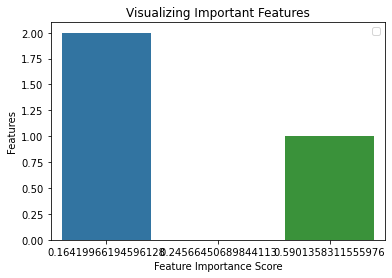

In [65]:
sns.barplot(x=feature_imp, y=feature_imp.index)
# Add labels to your graph
plt.xlabel('Feature Importance Score')
plt.ylabel('Features')
plt.title("Visualizing Important Features")
plt.legend()
plt.show()